# Interactive Plotting of covariances

## Initializations

In [1]:
%matplotlib widget


Use `%matplotlib qt` if you want seperate windows for plots

`%matplotlib notebook` might work if using the jupyter notebook in a browser, but doesn't work in vscode

In [15]:
import matplotlib.pyplot as plt
import numpy as np

from ipywidgets import interact, widgets

## Load Data

In [24]:
# Adapt this to the file directories you have

dir_ms="/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/MS/"
cov_fft=np.loadtxt(dir_ms+"cov_MS_fft_sigma_0.00_n_1048576.00_thetaMax_1.87.dat")
cov_T1inf=np.loadtxt(dir_ms+"cov_infinite_term1Numerical_sigma_0.00_n_1048456.68_thetaMax_1.87_gpu.dat")
cov_T2=np.loadtxt(dir_ms+"cov_square_term2Numerical_sigma_0.00_n_1048456.68_thetaMax_1.87_gpu.dat")
cov_T4=np.loadtxt(dir_ms+"cov_infinite_term4Numerical_sigma_0.00_n_1048456.68_thetaMax_1.87_gpu.dat")
cov_T5=np.loadtxt(dir_ms+"cov_infinite_term5Numerical_sigma_0.00_n_1048456.68_thetaMax_1.87_gpu.dat")
cov_T6=np.loadtxt(dir_ms+"cov_square_term6Numerical_sigma_0.00_n_1048456.68_thetaMax_1.87_gpu.dat")
cov_T7=np.loadtxt(dir_ms+"cov_infinite_term7Numerical_sigma_0.00_n_1048456.68_thetaMax_1.87_gpu.dat")

Map3ms=np.loadtxt(dir_ms+"map_cubed").T
Map3ms_mean=np.mean(Map3ms, axis=1)
Map3ms_std=np.std(Map3ms, axis=1)


## Plot Covariance as Lineplot

In [32]:
# Set Thetas labels
thetas_ind = np.array([[2, 2, 2], [2, 2, 4], [2, 2, 8], [2, 2, 16],
                       [2, 4, 4], [2, 4, 8], [2, 4, 16], [2, 8, 8],
                       [2, 8, 16], [2, 16, 16], [4, 4, 4], [4, 4, 8],
                       [4, 4, 16], [4, 8, 8], [4, 8, 16], [4, 16, 16],
                       [8, 8, 8], [8, 8, 16], [8, 16, 16], [16, 16, 16]])
thetas_labels = []
for thetas in thetas_ind:
    thetas_labels.append(f"{thetas[0]}' {thetas[1]}' {thetas[2]}'")
N = len(thetas_ind)
thetas_ticks = np.arange(0, N)

interactive(children=(IntSlider(value=9, description='bin_ix', max=19), Checkbox(value=True, description='plot…

<function __main__.updateCov(bin_ix, plotFFT=True, plotT1=False, plotT2=False, plotT4=False, plotT5=False, plotT6=False, plotT7=False, plotSum=False)>

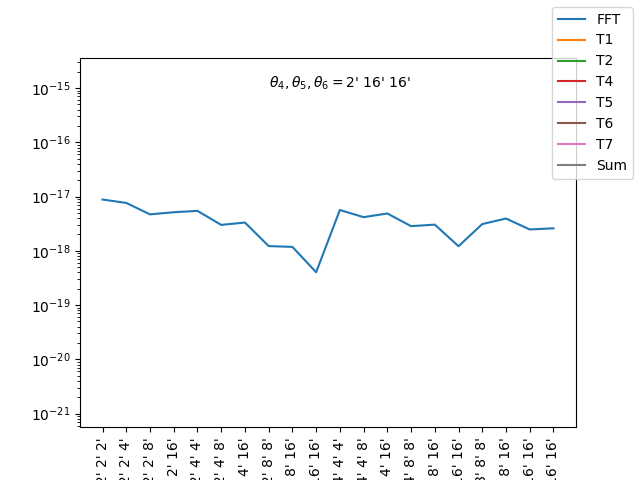

In [46]:
fig, ax=plt.subplots()
ax.set_yscale('log')
ax.set_xticks(thetas_ticks)
ax.set_xticklabels(thetas_labels, rotation=90)
thetaText=ax.text(N/2-3, 1e-15, r"$\theta_4, \theta_5, \theta_6=$"+thetas_labels[0])
line,=ax.plot(cov_fft[0], label='FFT')
T1,=ax.plot(cov_T1inf[0], label='T1')
T2,=ax.plot(cov_T1inf[0], label='T2')
T4,=ax.plot(cov_T1inf[0], label='T4')
T5,=ax.plot(cov_T1inf[0], label='T5')
T6,=ax.plot(cov_T1inf[0], label='T6')
T7,=ax.plot(cov_T1inf[0], label='T7')
Sum,=ax.plot(cov_T1inf[0], label='Sum')
fig.legend()

sumCovs=cov_T1inf+cov_T2+cov_T4+cov_T5+cov_T6+cov_T7

def updateCov(bin_ix, plotFFT=True, plotT1=False, plotT2=False, plotT4=False, plotT5=False, plotT6=False, plotT7=False, plotSum=False):
    thetaText.set_text(r"$\theta_4, \theta_5, \theta_6=$"+thetas_labels[bin_ix])
    if(plotFFT):
        line.set_ydata(cov_fft[bin_ix])
    else:
        line.set_ydata(np.nan*np.ones_like(cov_fft[bin_ix]))

    if(plotT1):
        T1.set_ydata(cov_T1inf[bin_ix])
    else:
        T1.set_ydata(np.nan*np.ones_like(cov_T1inf[bin_ix]))

    if(plotT2):
        T2.set_ydata(cov_T2[bin_ix])
    else:
        T2.set_ydata(np.nan*np.ones_like(cov_T2[bin_ix]))

    if(plotT4):
        T4.set_ydata(cov_T4[bin_ix])
    else:
        T4.set_ydata(np.nan*np.ones_like(cov_T4[bin_ix]))
    if(plotT5):
        T5.set_ydata(cov_T5[bin_ix])
    else:
        T5.set_ydata(np.nan*np.ones_like(cov_T5[bin_ix]))
    if(plotT6):
        T6.set_ydata(cov_T6[bin_ix])
    else:
        T6.set_ydata(np.nan*np.ones_like(cov_T6[bin_ix]))
    if(plotT7):
        T7.set_ydata(cov_T7[bin_ix])
    else:
        T7.set_ydata(np.nan*np.ones_like(cov_T7[bin_ix]))

    
    if(plotSum):
        Sum.set_ydata(sumCovs[bin_ix])
    else:
        Sum.set_ydata(np.nan*np.ones_like(sumCovs[bin_ix]))


interact(updateCov, bin_ix=(0, N-1))
